## Demographics

Exploring demographics from students:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Some Matplotlib configuration:

In [2]:
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 22 }
plt.rc('font', **font)

### Demograhics

In [3]:
xls = pd.ExcelFile('../../data/demographics/demographics.xlsx')
df = pd.read_excel(xls, 'Bio')

In [4]:
# df.head(2)

In [5]:
len(df['Student Number'].unique())

271

In [6]:
df['Study Period'].value_counts(dropna=False)

1    220
O     53
Name: Study Period, dtype: int64

In [7]:
df['Choice'].value_counts(dropna=False)

1.0     97
11.0    55
3.0     26
51.0    24
2.0     24
4.0     15
6.0      9
5.0      7
7.0      7
8.0      6
NaN      1
12.0     1
9.0      1
Name: Choice, dtype: int64

In [8]:
df['Gender'].value_counts(dropna=False)

M    240
F     33
Name: Gender, dtype: int64

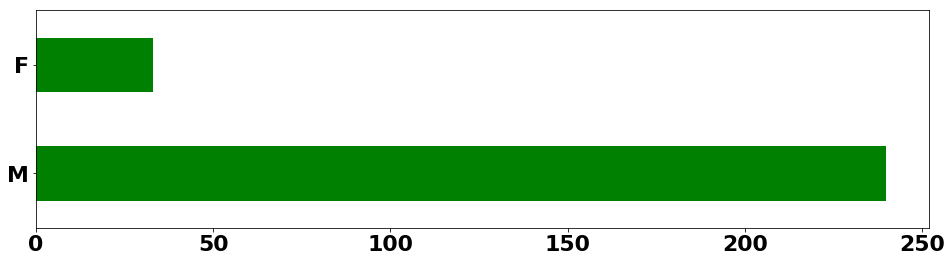

In [9]:
fig = pd.value_counts(df['Gender'].values, sort=True).plot.barh(figsize=(16, 4), color='g')

In [10]:
fig.get_figure().savefig('../../figures/exploring_GENDER.png', bbox_inches="tight")

In [11]:
df['Qualification'].value_counts(dropna=False)

CA       134
EC        74
ECSAO     53
DS        12
Name: Qualification, dtype: int64

In [12]:
df['Description'].value_counts(dropna=False)

BSc in Computer Applications              134
BSc in Enterprise Computing                74
Study Abroad (Engineering & Computing)     53
BSc in Data Science                        12
Name: Description, dtype: int64

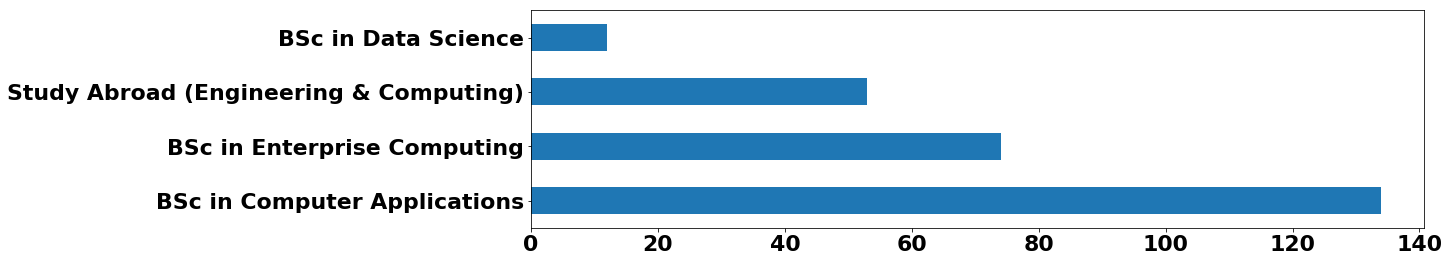

In [13]:
fig = pd.value_counts(df['Description'].values, sort=True).plot.barh(figsize=(16, 4))

In [14]:
fig.get_figure().savefig('../../figures/exploring_BSC_Desc.png', bbox_inches="tight")

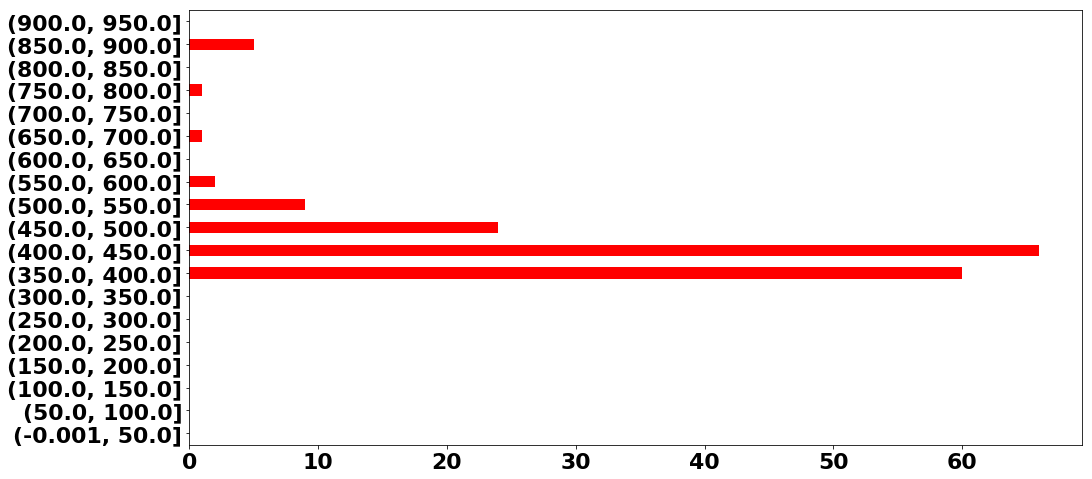

In [15]:
fig = pd.cut(df['WRS Score'], bins=range(0, 1000, 50), include_lowest=True).\
    value_counts(sort=False).plot.barh(rot=0, color="red", figsize=(16, 8))

In [16]:
fig.get_figure().savefig('../../figures/exploring_WRS_Score.png', bbox_inches="tight")

**Note:** There are different entry codes for CAO_POINTS

In [17]:
import datetime

def get_dates(col, days=4):
    base = df[col].min()
    limit = df[col].max()
    dates = []
    x = base.replace(day=1) # first day of the month
    while x < limit:
        dates.append(x)
        x += datetime.timedelta(days=days)
    return dates

In [18]:
df['Registration Date'] = pd.to_datetime(df['Registration Date'])

In [19]:
reg_dates = get_dates('Registration Date')

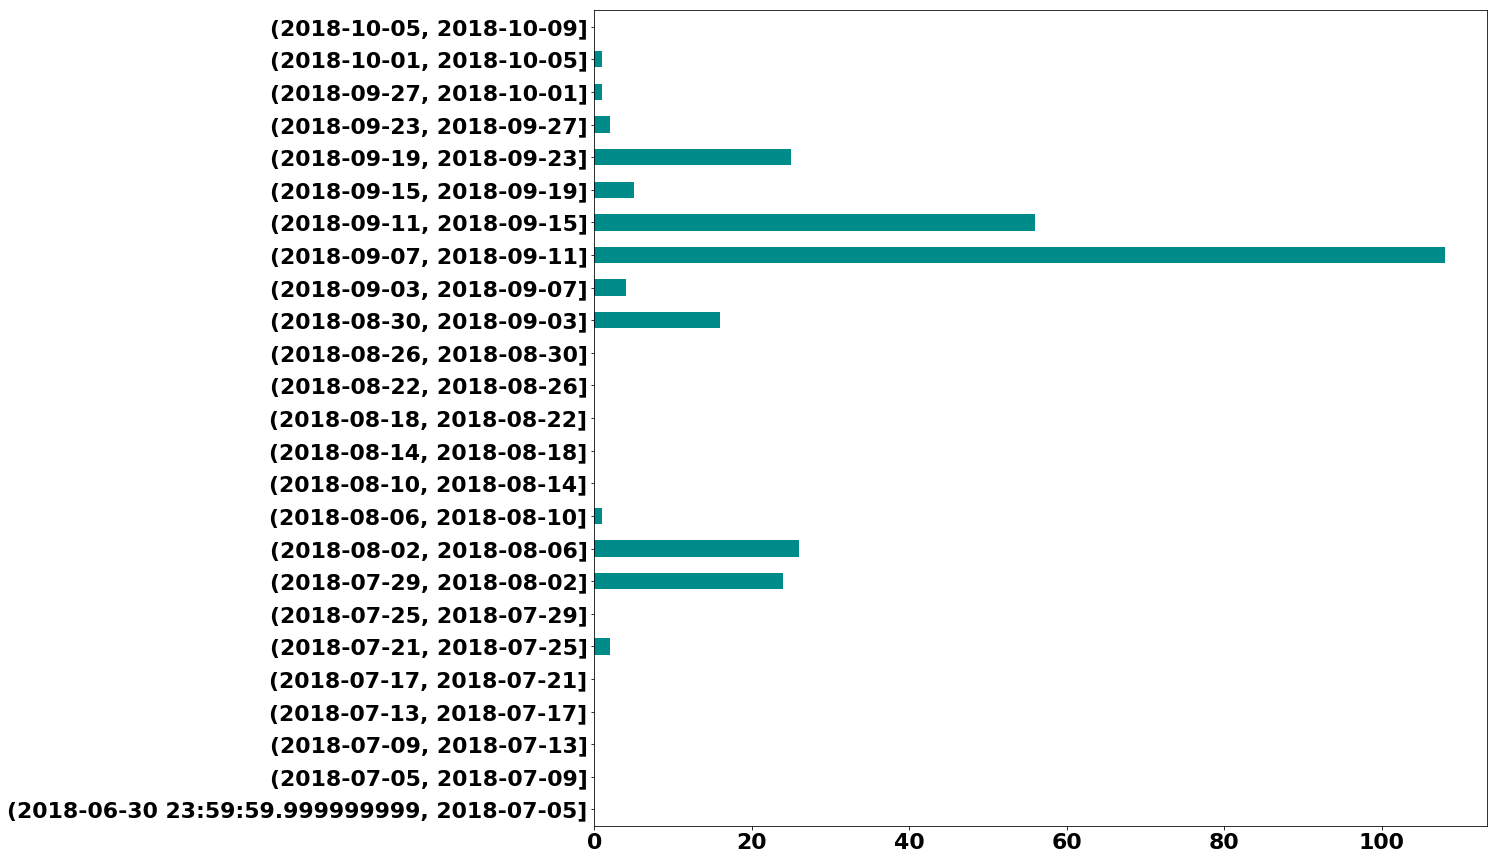

In [20]:
fig = pd.cut(df['Registration Date'], bins=reg_dates, include_lowest=True).\
    value_counts(sort=False).plot.barh(rot=0, color="darkcyan", figsize=(16, 15))

In [21]:
fig.get_figure().savefig('../../figures/exploring_Registration_Date.png', bbox_inches="tight")

### Leaving Cert

In [22]:
df_LC = pd.read_excel(xls, 'Leaving Cert')

In [23]:
# df_LC.head(2)

In [24]:
len(df_LC['Student Number'].unique())

200

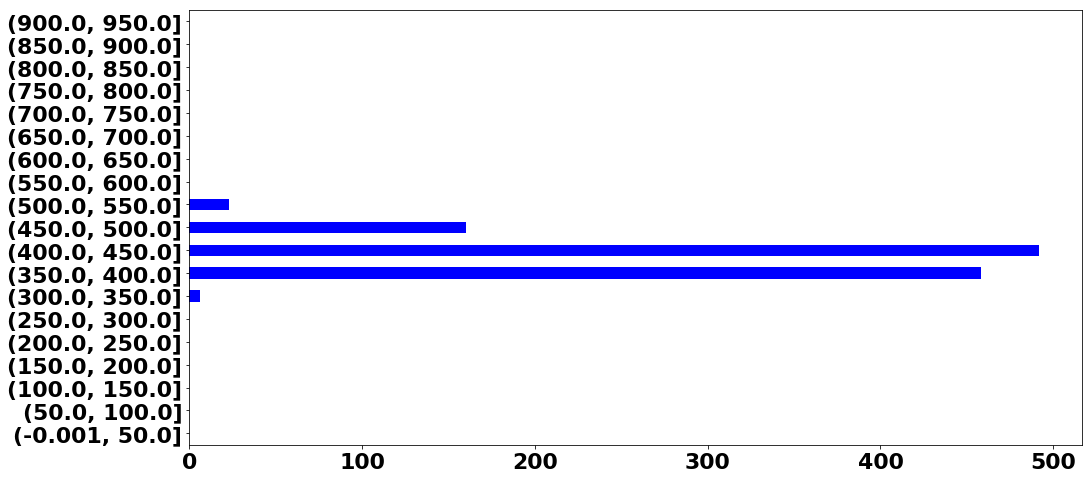

In [25]:
fig = pd.cut(df_LC['CAO Code'], bins=range(0, 1000, 50), include_lowest=True).\
    value_counts(sort=False).plot.barh(rot=0, color="b", figsize=(16, 8))

In [26]:
fig.get_figure().savefig('../../figures/exploring_CAO_Code.png', bbox_inches="tight")

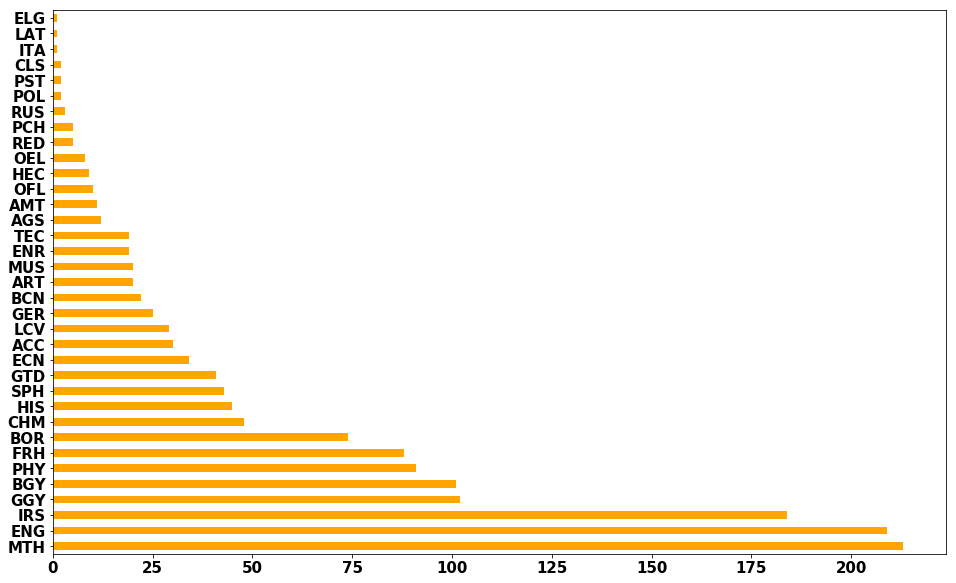

In [27]:
fig = pd.value_counts(df_LC['Subject'].values, sort=True).plot.barh(figsize=(16, 10), color='orange', fontsize=15)

In [28]:
fig.get_figure().savefig('../../figures/exploring_Subject.png', bbox_inches="tight")

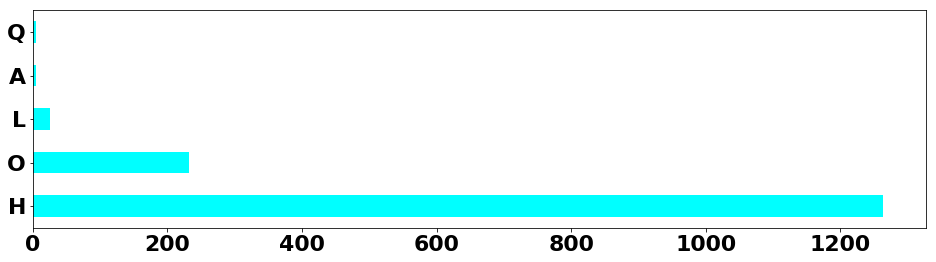

In [29]:
fig = pd.value_counts(df_LC['Grade'].values, sort=True).plot.barh(figsize=(16, 4), color='cyan')

In [30]:
fig.get_figure().savefig('../../figures/exploring_Grade.png', bbox_inches="tight")

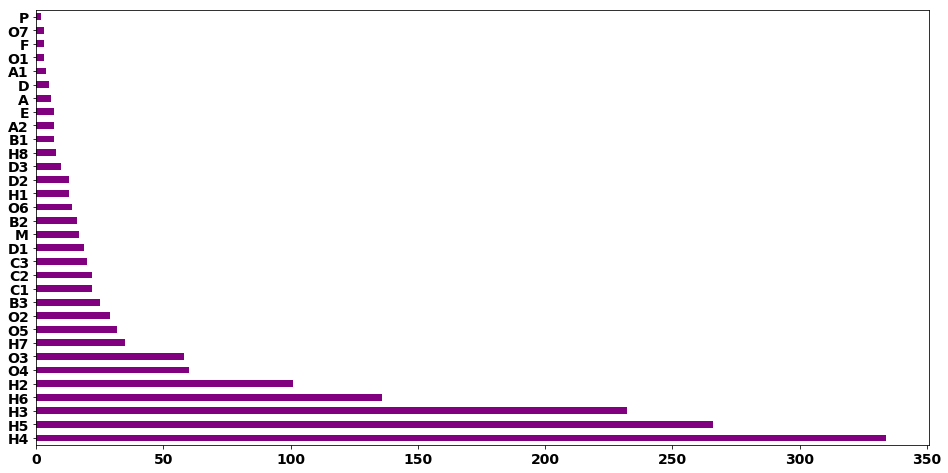

In [31]:
fig = pd.value_counts(df_LC['Symbol'].values, sort=True).plot.barh(figsize=(16, 8), color='purple', fontsize=14)

In [32]:
fig.get_figure().savefig('../../figures/exploring_Symbol.png', bbox_inches="tight")

### Students

Find out which students are missing on the demographics datasheet:

In [33]:
students = pd.read_csv('../../data/emails/emails.ca116.2019.csv')

In [34]:
# students.head(2)

In [35]:
student_usernames = students['Username'].unique()

In [36]:
len(students)

138

In [37]:
df_unique_usernames = df.Username.unique()

In [38]:
len(df_unique_usernames)

272

In [39]:
missing = [username for username in student_usernames if username not in df_unique_usernames]

In [40]:
len(missing)

4

In [41]:
# missing

In [42]:
# students[students['Username'].isin(missing)]